In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [17]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 45kB/s 
     |████████████████████████████████| 450kB 50.8MB/s 
     |████████████████████████████████| 3.8MB 50.0MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


# 0 한글 폰트

In [3]:
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"
!unzip "NotoSansCJKkr-hinted.zip"

--2020-03-10 07:52:30--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 74.125.31.128, 2607:f8b0:400c:c02::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M  54.2MB/s    in 2.1s    

2020-03-10 07:52:33 (54.2 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  inflating: NotoSansCJKkr-Regular.otf  
  inflating: NotoSansCJKkr-Thin.

In [0]:
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

In [0]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = "Noto Sans CJK KR"

# 1. 데이터 읽기 

Contents of the Notebook:
Part1: Exploratory Data Analysis(EDA):

1)Analysis of the features.

2)Finding any relations or trends considering multiple features.
Part2: Feature Engineering and Data Cleaning:

1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.
Part3: Predictive Modeling

1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction

# 1. 데이터 불러오기

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
import os
from pathlib import Path

folder = "Colab Notebooks/dacon"
project_dir = "temperature_forecasting"

base_path = Path("/content/drive/My Drive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)
# for x in list(project_path.glob("*")):
#     if x.is_dir():
#         dir_name = str(x.relative_to(project_path))
#         os.rename(dir_name, dir_name.split(" ", 1)[0])
print(f"현재 디렉토리 위치: {os.getcwd()}")

현재 디렉토리 위치: /content/drive/My Drive/Colab Notebooks/dacon/temperature_forecasting


In [8]:
df = pd.read_csv('./data/'+'train.csv')
df.shape

(4752, 60)

* 4320개(30일)
* 432개(3일) 

|-|30일(train)|3일(train)|80일(test)|
|---|---|---|---|
|Y18|NULL|432개|NULL|
|Y00-Y17|4320개|NULL|NULL|
|X00-X17|4320개|432개|11520개|

In [0]:
n = 4320

In [58]:
df_test = pd.read_csv('./data/test.csv')
df_test.shape

(11520, 41)

In [61]:
df_test[feat_temp].describe()

,X00,X07,X28,X31,X32
count,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,25.145625,26.032352,26.468750,24.544392,24.519905
std,3.824374,3.513596,3.527912,4.040956,4.021288
min,15.500000,17.300000,18.700000,14.200000,15.100000
25%,22.300000,23.300000,23.700000,21.500000,21.400000
50%,25.300000,26.100000,26.500000,24.500000,24.500000
75%,27.600000,28.300000,28.800000,27.200000,27.300000
max,36.300000,36.000000,36.500000,35.300000,35.800000


## x

* feat_temp: 기온 
* feat_air_press: 현지기압
* feat_wind_speed: 풍속
* feat_rainfall: 일일 누적강수량 
* feat_sea_press: 해면기압
* feat_insol: 일일 누적일사량
* feat_humid: 습도
* feat_dir_wind: 풍향



In [0]:
#feat_x = [feat_temp, feat_air_press, feat_wind_speed, feat_rainfall, feat_sea_press, feat_insol, feat_humid, feat_dir_wind]
feat_x = ['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09', 
          'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 
          'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 
          'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39']
feat_temp = ['X00', 'X07', 'X28', 'X31', 'X32']
feat_air_press = ['X01', 'X06', 'X22', 'X27', 'X29']
feat_wind_speed = ['X02', 'X03', 'X18', 'X24', 'X26']
feat_rainfall = ['X04', 'X10', 'X21', 'X36', 'X39']
feat_sea_press = ['X05', 'X08', 'X09', 'X23', 'X33']
feat_insol = ['X11', 'X14', 'X16', 'X19', 'X34']
feat_humid = ['X12', 'X20', 'X30', 'X37', 'X38']
feat_dir_wind = ['X13', 'X15', 'X17', 'X25', 'X35']

In [11]:
df[feat_x].head(3)

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0


In [12]:
df[feat_x].tail(3)

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,1007.5,2.5,23.88,95.9,127.8,0.0,256.1,0.0,299.1,0.6,0.0,90.8,10.5,1000.4,1007.6,0.0,0.0,0.2,1006.0,23.6,999.5,90.2,17.8,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5
4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,1007.5,2.5,23.88,95.9,323.8,0.0,255.1,0.0,0.0,0.6,0.0,91.5,10.5,1000.4,1007.6,0.0,0.0,0.1,1006.0,23.3,999.5,90.1,17.7,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5
4751,19.1,987.6,1.0,0.3,0.0,1006.8,987.8,21.2,1007.5,1007.4,2.5,23.88,96.2,0.0,0.0,237.2,0.0,17.7,0.0,0.0,93.0,10.5,1000.3,1007.6,0.0,0.0,0.1,1006.1,23.2,999.5,89.6,17.7,19.5,1007.7,22.16,157.5,0.0,84.0,59.5,0.5


## y

### feat_y

In [0]:
feat_y = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']

In [14]:
df[feat_y].shape

(4752, 18)

Y00 -Y17의 null 값이 없는 부분만 추출 

In [15]:
df_y = df[feat_y][:n]
df_y.shape 

(4320, 18)

### y 그룹화

6개의 그룹으로 나눠보기로 한다. 

'Y03', 'Y04'  
'Y00'  
'Y05', 'Y08', 'Y14'  
'Y13','Y01', 'Y02'  
'Y09', 'Y10', 'Y11', 'Y17', 'Y15',  Y16'  
'Y12', 'Y06', 'Y07'



In [0]:
df_y_g1 = df_y[['Y03', 'Y04']]
df_y_g2 = df_y[['Y00']]
df_y_g3 = df_y[['Y05', 'Y08', 'Y14']]
df_y_g4 = df_y[['Y13','Y01', 'Y02']]
df_y_g5 = df_y[['Y09', 'Y10', 'Y11', 'Y17', 'Y15', 'Y16']]
df_y_g6 = df_y[['Y12', 'Y06', 'Y07']]

# model

간단한 모델을 구성해보자  


1.   X 중 기온 데이터인 feat_temp만 사용해서 Y00~17의 온도를 추정하는 모델 만들기 
2.   1번에서 만든 모델로 Y00 ~ Y17의 비어있는 3일간의 데이터를 예측  
3.   2번에서 추정한 Y00 ~ Y17의 온도, Y18을 이용해서 Y00~17로 Y18을 추정하는 모델 만들기
4.   test data에 대해 1번에서 만든 모델로 Y00 ~ Y17을 예측. 예측한 Y00 ~ Y17과 3번에서 만든 모델로 Y18 온도를 예측  



## 1.
df_y_g4에 대해 모델링 해보기 (X 5군데와 전체적으로 유사해서 선택함) 

데이터셋  
* X_feat_temp 와 Y00-Y17, 모두 존재하는 rows는 4320 개.  
* 해당 시점에 Y00-Y17 지역의 온도를 추정할 것이므로 시리즈 데이터로 보지 않음.
* 모든 features를 사용하지는 않고 feat_temp만 사용.
* 모든 지역을 맞추기보다 그룹화 된 지역의 평균 온도를 타겟으로 함.   
* 즉, feat_temp = ['X00', 'X07', 'X28', 'X31', 'X32']를 features로 보고, mean(['Y13','Y01', 'Y02'])을 target으로 하는 모델을 구성할 것.
* train 90%, test 10%


### dataset 

#### Split the data into train and test

In [0]:
## 
frac = 1 # train data 비율 

In [0]:
## y_col : y_col인 컬럼들의 평균을 타겟 값으로 할 것.
y_col = list(df_y_g3.columns)

In [0]:
dataset = df[feat_temp+y_col][:n]
dataset['Y']= df[y_col].mean(axis=1)
dataset = dataset.drop(y_col, axis=1) 

In [0]:
train_dataset = dataset.sample(frac=frac,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [66]:
train_dataset.shape, test_dataset.shape

((4320, 6), (0, 6))

#### Split features from labels

In [0]:
train_labels = train_dataset.pop('Y')
test_labels = test_dataset.pop('Y')

In [68]:
train_dataset.shape, test_dataset.shape

((4320, 5), (0, 5))

In [69]:
train_labels.shape, test_labels.shape

((4320,), (0,))

### model

#### Build the model

In [0]:
def build_model():
    model = keras.Sequential([
            layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
            layers.Dense(32, activation='relu'),
            layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

#### Inspect the model

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [73]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.38509464],
       [ 0.05915594],
       [ 0.23225442],
       [ 0.17817914],
       [ 0.22961819],
       [ 0.07750625],
       [-0.11307767],
       [ 0.1702517 ],
       [ 0.31646472],
       [ 0.5491213 ]], dtype=float32)

#### Train the model

In [74]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [75]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,5.387274,1.501108,5.387273,6.271805,1.727174,6.271805,995
996,5.543756,1.526418,5.543756,5.163499,1.445463,5.163498,996
997,5.462576,1.511798,5.462574,5.901567,1.655826,5.901568,997
998,5.484449,1.516454,5.484448,5.466640,1.506970,5.466639,998
999,5.582688,1.538910,5.582688,5.683089,1.592761,5.683089,999


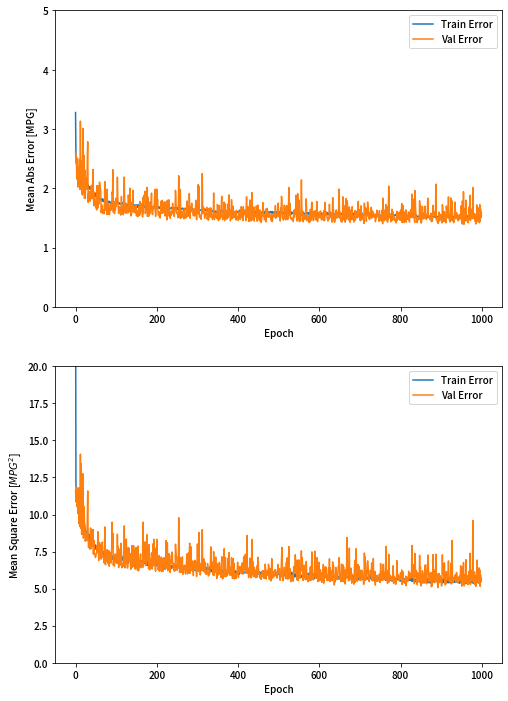

In [76]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

# Make predictions

In [0]:
test_predictions = model.predict(df_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [79]:
df_test[]

KeyError: ignored

In [80]:
df_test

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,1007.2,0.0,0.0,96.1,333.6,0.0,199.6,0.0,36.0,1.1,0.0,94.7,0.0,1000.3,1007.6,0.0,0.0,0.1,1006.0,23.2,999.5,91.4,17.5,19.2,1007.6,0.00,194.7,0.0,84.0,59.9,0.0
1,4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,1007.2,0.0,0.0,96.2,335.5,0.0,194.0,0.0,127.7,0.6,0.0,95.3,0.0,1000.2,1007.5,0.0,0.0,0.3,1005.9,23.1,999.4,91.6,17.4,19.1,1007.5,0.00,173.1,0.0,84.0,60.5,0.0
2,4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,1007.2,0.0,0.0,96.4,0.0,0.0,172.9,0.0,59.0,0.0,0.0,93.9,0.0,1000.1,1007.4,0.0,0.0,0.7,1005.9,23.1,999.3,92.0,17.2,19.0,1007.5,0.00,208.6,0.0,85.0,60.8,0.0
3,4755,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,1007.2,0.0,0.0,96.5,252.9,0.0,153.5,0.0,54.9,0.4,0.0,94.4,0.0,1000.1,1007.4,0.0,0.0,0.6,1005.8,22.8,999.3,93.0,17.2,18.8,1007.4,0.00,185.0,0.0,85.8,61.2,0.0
4,4756,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,1007.2,0.0,0.0,96.6,238.2,0.0,173.8,0.0,48.8,0.8,0.0,95.7,0.0,1000.2,1007.3,0.0,0.0,0.7,1005.9,22.8,999.2,92.3,17.4,18.9,1007.5,0.00,162.8,0.0,87.3,61.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,16267,25.7,993.2,3.9,3.8,0.0,1011.7,993.8,26.3,1013.3,1012.6,0.0,17.1,88.1,65.6,0.0,101.6,0.0,176.7,1.8,0.0,77.3,0.0,1005.2,1012.9,1.6,169.8,4.5,1011.5,27.7,1004.9,76.6,23.6,24.4,1013.0,19.56,169.6,0.0,79.7,67.5,0.5
11516,16268,25.6,993.2,3.0,3.0,0.0,1011.7,993.8,26.3,1013.3,1012.6,0.0,17.1,75.5,51.9,0.0,84.8,0.0,187.8,2.9,0.0,78.1,0.0,1005.2,1012.9,1.9,138.9,4.7,1011.4,27.6,1004.9,76.7,25.3,24.4,1012.9,19.56,175.9,0.0,79.6,67.9,0.5
11517,16269,25.6,993.2,3.8,2.5,0.0,1011.9,993.7,26.2,1013.2,1012.7,0.0,17.1,77.5,29.0,0.0,104.5,0.0,184.8,2.9,0.0,78.9,0.0,1005.4,1013.0,2.3,146.7,4.8,1011.4,27.5,1005.0,77.1,24.9,24.3,1012.9,19.56,204.7,0.0,79.2,68.3,0.5
11518,16270,25.5,993.2,2.4,2.8,0.0,1011.8,993.7,26.1,1013.2,1012.6,0.0,17.1,74.1,30.0,0.0,103.0,0.0,187.8,3.4,0.0,79.7,0.0,1005.3,1013.0,1.7,146.5,3.5,1011.4,27.3,1005.0,77.3,25.3,24.2,1012.9,19.56,174.2,0.0,80.1,68.8,0.5
